In [1]:
# import os

# def list_files(startpath):
#     for root, dirs, files in os.walk(startpath):
#         level = root.replace(startpath, '').count(os.sep)
#         indent = ' ' * 4 * (level)
#         print('{}{}/'.format(indent, os.path.basename(root)))
#         subindent = ' ' * 4 * (level + 1)
#         for f in files:
#             print('{}{}'.format(subindent, f))

In [2]:
# list_files('./data/')

/
SHLDataset_preview_v1_part1/
    SHLDataset_preview_v1/
        doc_dataset.pdf
        LICENSE
        scripts/
            actlen.png
            dtcFindInstancesFromLabelStream.m
            dtcFindTimeSeriesDiscontinuities.m
            getdir.m
            hwDemo1.m
            hwDemo2.m
            hwDemo3.m
            hwDemo4.m
            map.png
            matread.mexw64
        User1/
            datasetstatus.mat
            labelstatus.mat
            220617/
                00inf.txt
                Bag_Ambient.txt
                Bag_API.txt
                Bag_Battery.txt
                Bag_Cells.txt
                Bag_DeprCells.txt
                Bag_GPS.txt
                Bag_Location.txt
                Bag_Motion.txt
                Bag_WiFi.txt
                data.mat
                datainf.mat
                GPS.kml
                Hand_Ambient.txt
                Hand_API.txt
                Hand_Battery.txt
                Hand_Cells.txt
              

In [3]:
# for _ in os.walk('./data/'):
#       print(_)

('./data/', ['SHLDataset_preview_v1_part1', 'SHLDataset_preview_v1_part2', 'SHLDataset_preview_v1_part3'], [])
('./data/SHLDataset_preview_v1_part1', ['SHLDataset_preview_v1'], [])
('./data/SHLDataset_preview_v1_part1\\SHLDataset_preview_v1', ['scripts', 'User1'], ['doc_dataset.pdf', 'LICENSE'])
('./data/SHLDataset_preview_v1_part1\\SHLDataset_preview_v1\\scripts', [], ['actlen.png', 'dtcFindInstancesFromLabelStream.m', 'dtcFindTimeSeriesDiscontinuities.m', 'getdir.m', 'hwDemo1.m', 'hwDemo2.m', 'hwDemo3.m', 'hwDemo4.m', 'map.png', 'matread.mexw64'])
('./data/SHLDataset_preview_v1_part1\\SHLDataset_preview_v1\\User1', ['220617', '260617', '270617'], ['datasetstatus.mat', 'labelstatus.mat'])
('./data/SHLDataset_preview_v1_part1\\SHLDataset_preview_v1\\User1\\220617', [], ['00inf.txt', 'Bag_Ambient.txt', 'Bag_API.txt', 'Bag_Battery.txt', 'Bag_Cells.txt', 'Bag_DeprCells.txt', 'Bag_GPS.txt', 'Bag_Location.txt', 'Bag_Motion.txt', 'Bag_WiFi.txt', 'data.mat', 'datainf.mat', 'GPS.kml', 'Hand_Am

Reading the data from txt files and saving as numpy files

In [25]:
# import numpy as np
# from tqdm import tqdm

# # Base directory where the data is stored
# base_dir = "./data/"

# # Positions to be considered
# positions = ["Hand", "Bag", "Hips", "Torso"]

# # Function to read the motion data
# def read_motion_file(file_path):
#       return np.loadtxt(file_path)

# # Function to read the label data
# def read_label_file(file_path):
#       return np.loadtxt(file_path)

# # Function to process data for a single user
# def process_user_data(user_dir, user_id):
#       for root, dirs, files in os.walk(user_dir):
#             for record_id in tqdm(dirs, desc=f'Processing records for User {user_id}', leave=False):
#                   record_dir = os.path.join(root, record_id)
#                   motion_data = {}
#                   label_file_path = os.path.join(record_dir, 'Label.txt')
                  
#                   if os.path.exists(label_file_path):
#                         label_data = read_label_file(label_file_path)
                  
#                   for position in positions:
#                         motion_file_path = os.path.join(record_dir, f'{position}_Motion.txt')
#                         if os.path.exists(motion_file_path):
#                               motion_data[position] = read_motion_file(motion_file_path)
                  
#                   if motion_data:
#                         # Save the motion and label data to numpy arrays
#                         for position, data in motion_data.items():
#                               output_dir = os.path.join(base_dir, 'processed_data', f'User_{user_id}', record_id)
#                               os.makedirs(output_dir, exist_ok=True)
#                               motion_output_path = os.path.join(output_dir, f'{position}_Motion.npy')
#                               label_output_path = os.path.join(output_dir, 'Label.npy')
#                               np.save(motion_output_path, data)
#                               np.save(label_output_path, label_data)

# # Process data for each user
# for user_id in tqdm(range(1, 4), desc='Processing all users'):
#       user_dir = os.path.join(base_dir, f'SHLDataset_preview_v1_part{user_id}', 'SHLDataset_preview_v1', f'User{user_id}')
#       process_user_data(user_dir, user_id)


Processing all users: 100%|██████████| 3/3 [06:36<00:00, 132.02s/it]


Concatenating these files into one dataset

In [1]:
# import os
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# # Base directory where the processed data is stored
# processed_data_dir = "./data/processed_data/"

# # Positions to be considered
# positions = ["Hand", "Bag", "Hips", "Torso"]

# # Function to load and process data for a specific user and record
# def process_user_record(user_id, record_id, user_record_dir):
#     combined_data = []

#     label_file_path = os.path.join(user_record_dir, 'Label.npy')
#     if not os.path.exists(label_file_path):
#         return None
    
#     label_data = np.load(label_file_path)

#     for position in positions:
#         motion_file_path = os.path.join(user_record_dir, f'{position}_Motion.npy')
        
#         if os.path.exists(motion_file_path):
#             motion_data = np.load(motion_file_path)
            
#             # Create a DataFrame for motion data
#             motion_df = pd.DataFrame(motion_data, columns=[
#                 'time_ms', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyroscope_x',
#                 'gyroscope_y', 'gyroscope_z', 'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
#                 'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'gravity_x',
#                 'gravity_y', 'gravity_z', 'linear_acceleration_x', 'linear_acceleration_y',
#                 'linear_acceleration_z', 'pressure', 'altitude', 'temperature'
#             ])
            
#             # Create columns for user, date, position, and label
#             motion_df['User'] = user_id
#             motion_df['Date'] = record_id
#             motion_df['Position'] = position
#             motion_df['Coarse_label'] = label_data[:, 1]
#             motion_df['Fine_label'] = label_data[:, 2]
            
#             combined_data.append(motion_df)
    
#     return pd.concat(combined_data, ignore_index=True) if combined_data else None

# # Process data for each user and save into separate datasets
# for user_id in range(1, 4):
#     user_dir = os.path.join(processed_data_dir, f'User_{user_id}')
#     user_output_file = f'./data/User_{user_id}_dataset.csv'
#     header_saved = False
    
#     if os.path.exists(user_dir):
#         record_ids = os.listdir(user_dir)
        
#         for record_id in tqdm(record_ids, desc=f'Processing records for User {user_id}', leave=True):
#             user_record_dir = os.path.join(user_dir, record_id)
#             record_data = process_user_record(user_id, record_id, user_record_dir)
            
#             if record_data is not None:
#                 if not header_saved:
#                     record_data.to_csv(user_output_file, mode='a', index=False)
#                     header_saved = True
#                 else:
#                     record_data.to_csv(user_output_file, mode='a', index=False, header=False)


Processing records for User 3: 100%|██████████| 3/3 [08:18<00:00, 166.02s/it]


In [4]:
# user1_df = pd.read_csv('./data/User_1_dataset.csv')
# print(user1_df.shape)

# del user1_df, record_data

##### Let's downsample the data from 100Hz to 5Hz by selecting every 20th row and dropping the rest.

In [2]:
# import pandas as pd
# from tqdm import tqdm
# import os

# # Directory where the user datasets are stored
# user_data_dir = "./data/"

# # Function to downsample the data
# def downsample_data(input_file, output_file, downsample_rate=20):
#     # Read the dataset
#     data = pd.read_csv(input_file)
    
#     # Downsample the data by selecting every 20th row
#     downsampled_data = data.iloc[::downsample_rate, :]
    
#     # Save the downsampled data
#     downsampled_data.to_csv(output_file, index=False)

# # Process each user's dataset
# for user_id in range(1, 4):
#     input_file = os.path.join(user_data_dir, f'User_{user_id}_dataset.csv')
#     output_file = os.path.join(user_data_dir, f'User_{user_id}_downsampled_dataset.csv')
    
#     if os.path.exists(input_file):
#         downsample_data(input_file, output_file)
#         print(f'Downsampled data for User {user_id} saved to {output_file}')
#     else:
#         print(f'File {input_file} does not exist')

Downsampled data for User 1 saved to ./data/User_1_downsampled_dataset.csv
Downsampled data for User 2 saved to ./data/User_2_downsampled_dataset.csv
Downsampled data for User 3 saved to ./data/User_3_downsampled_dataset.csv


##### Next, I want to analyze and visualize the journey segments in the `coarse_label` column

In [1]:
import numpy as np
import pandas as pd

1. Load the data

In [2]:
user1_file = './data/User_1_downsampled_dataset.csv'
user2_file = './data/User_2_downsampled_dataset.csv'
user3_file = './data/User_3_downsampled_dataset.csv'

data = pd.read_csv(user1_file)

In [3]:
for date in data.Date.unique():
      print(f'{date}:')
      print(data[data['Date'] == date].Coarse_label.value_counts(), '\n')

220617:
0.0    563842
5.0    198627
2.0     77694
1.0     50108
3.0     24587
6.0     14103
Name: Coarse_label, dtype: int64 

260617:
0.0    362924
6.0    182628
1.0     84905
4.0     74722
2.0     72331
3.0      2110
Name: Coarse_label, dtype: int64 

270617:
0.0    243379
8.0    182387
7.0    179423
1.0     38717
4.0     24606
2.0     10788
Name: Coarse_label, dtype: int64 



In [4]:
data2 = pd.read_csv(user2_file)
data3 = pd.read_csv(user3_file)

In [5]:
for date in data2.Date.unique():
      print(f'{date}:')
      print(data2[data2['Date'] == date].Coarse_label.value_counts(), '\n')

140617:
4.0    163801
2.0    161056
0.0    153368
1.0    112812
6.0     44096
3.0     18288
Name: Coarse_label, dtype: int64 

140717:
8.0    212150
7.0    161404
0.0    106986
2.0     81049
1.0     45963
6.0     20388
Name: Coarse_label, dtype: int64 

180717:
5.0    308671
0.0    119097
1.0     84305
2.0     54919
6.0     19788
Name: Coarse_label, dtype: int64 



In [6]:
for date in data3.Date.unique():
      print(f'{date}:')
      print(data3[data3['Date'] == date].Coarse_label.value_counts(), '\n')

30717:
8.0    221997
7.0    152402
0.0    116450
1.0     69624
2.0     21008
Name: Coarse_label, dtype: int64 

70717:
0.0    225002
1.0    176680
2.0    140456
5.0    100800
6.0     99290
3.0     37192
Name: Coarse_label, dtype: int64 

140617:
7.0    122392
1.0    107366
4.0     76811
2.0     64489
0.0     21662
Name: Coarse_label, dtype: int64 



In [7]:
np.round(data.Coarse_label.value_counts(normalize=True)*100, 2)

0.0    49.00
5.0     8.32
6.0     8.24
8.0     7.64
7.0     7.51
1.0     7.28
2.0     6.73
4.0     4.16
3.0     1.12
Name: Coarse_label, dtype: float64

Let's see the distribution of the labels for each user. I'll drop label `0.0` because that's a `NULL` label

In [8]:
data[data.Coarse_label != 0.0]

,time_ms,acceleration_x,acceleration_y,acceleration_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,...,linear_acceleration_y,linear_acceleration_z,pressure,altitude,temperature,User,Date,Position,Coarse_label,Fine_label
4556,1.498121e+12,-8.226477,-2.719813,-6.876147,-0.717033,0.181210,-0.406699,30.875000,16.812500,26.750000,...,-4.474876,-2.333527,1005.474372,0.0,0.0,1,220617,Hand,2.0,5.0
4557,1.498121e+12,-11.382036,-4.711789,-10.275913,0.497543,-2.994469,-0.590985,33.625000,16.625000,27.312500,...,3.401900,-0.546400,1005.381619,0.0,0.0,1,220617,Hand,2.0,5.0
4558,1.498121e+12,-4.563349,-3.035848,-9.734824,0.602772,0.302710,-2.142611,35.812500,30.437500,7.875000,...,4.842100,-11.778100,1005.341444,0.0,0.0,1,220617,Hand,2.0,5.0
4559,1.498121e+12,-5.434838,1.312023,-18.655620,-3.608026,4.322921,3.969147,30.625000,39.187500,-2.437500,...,0.353700,-5.208200,1005.497610,0.0,0.0,1,220617,Hand,2.0,5.0
4560,1.498121e+12,-8.710106,-5.114015,-1.024718,-0.621243,-0.927884,-1.554389,33.124927,15.124725,32.687711,...,-3.853800,0.305900,1005.481430,0.0,0.0,1,220617,Hand,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384782,1.498588e+12,7.382840,7.878736,0.498261,0.847658,-1.622890,-0.838360,-20.126976,-43.564476,7.873024,...,-0.913258,-2.254844,995.948375,0.0,0.0,1,270617,Torso,1.0,4.0
2384783,1.498588e+12,6.996513,6.547882,1.304092,0.658060,0.847775,-1.088338,-10.934776,-46.347836,13.225561,...,3.459851,1.783249,995.913314,0.0,0.0,1,270617,Torso,1.0,4.0
2384784,1.498588e+12,6.508318,9.711138,-0.273703,-0.642691,3.263402,-0.445731,-5.060084,-44.648843,19.645378,...,-3.662165,-0.897846,995.901533,0.0,0.0,1,270617,Torso,1.0,4.0
2384785,1.498588e+12,2.258614,5.994174,1.375901,0.933543,-2.507672,0.278825,-5.486247,-46.062500,14.891935,...,-2.047095,-0.575983,995.961038,0.0,0.0,1,270617,Torso,1.0,4.0


In [9]:
i=1
for ds in [data, data2, data3]:
      dataset = ds[ds.Coarse_label != 0.0]
      print(f"Transport Mode Distribution for User{i}:")
      print(np.round(dataset.Coarse_label.value_counts(normalize=True)*100, 2), '\n')
      i+=1

Transport Mode Distribution for User1:
5.0    16.31
6.0    16.16
8.0    14.98
7.0    14.73
1.0    14.27
2.0    13.21
4.0     8.16
3.0     2.19
Name: Coarse_label, dtype: float64 

Transport Mode Distribution for User2:
5.0    20.73
2.0    19.95
1.0    16.33
8.0    14.25
4.0    11.00
7.0    10.84
6.0     5.66
3.0     1.23
Name: Coarse_label, dtype: float64 

Transport Mode Distribution for User3:
1.0    25.43
7.0    19.76
2.0    16.25
8.0    15.97
5.0     7.25
6.0     7.14
4.0     5.52
3.0     2.67
Name: Coarse_label, dtype: float64 



In [10]:
i=1
for ds in [data, data2, data3]:
      dataset = ds[ds.Coarse_label != 0.0]
      print(f"Transport Mode Distribution for User{i}:")
      print(np.round(dataset.Fine_label.value_counts(normalize=True)*100, 2), '\n')
      i+=1

Transport Mode Distribution for User1:
9.0     16.31
5.0     12.32
4.0     11.38
16.0    11.19
11.0     9.56
8.0      8.16
17.0     8.16
18.0     6.82
14.0     5.54
15.0     3.55
7.0      2.19
1.0      1.11
3.0      1.08
12.0     1.06
6.0      0.89
2.0      0.69
Name: Fine_label, dtype: float64 

Transport Mode Distribution for User2:
9.0     20.73
5.0     15.26
18.0    14.25
8.0     11.00
16.0    10.66
4.0     10.32
3.0      5.79
6.0      4.70
12.0     4.27
14.0     1.39
7.0      1.23
1.0      0.22
15.0     0.18
Name: Fine_label, dtype: float64 

Transport Mode Distribution for User3:
16.0    18.92
5.0     15.52
18.0    15.51
3.0     10.83
4.0      9.60
9.0      7.25
8.0      5.52
1.0      5.01
14.0     4.75
7.0      2.67
12.0     2.40
15.0     0.84
6.0      0.73
17.0     0.45
Name: Fine_label, dtype: float64 



For now, we'll not concern ourselves with trying to detect if the user is a driver or a passenger as the data doesn't have samples for that.

2. Identify Segments within each day. Use the `shift` method to find where the `coarse_label` changes.

In [11]:
del data2, data3

In [12]:
data[data['Coarse_label'] != 0.0].index

Int64Index([   4556,    4557,    4558,    4559,    4560,    4561,    4562,
               4563,    4564,    4565,
            ...
            2384777, 2384778, 2384779, 2384780, 2384781, 2384782, 2384783,
            2384784, 2384785, 2384786],
           dtype='int64', length=1217736)

In [13]:
# drop Coarse_label == 0.0 as this represents NaN
keep_rows = data[data['Coarse_label'] != 0.0].index
data = data.iloc[keep_rows, :]
data = data.reset_index(drop=True)

# Ensure the 'Date' column is treated as a string
data['Date'] = data['Date'].astype(str) #it was already a string wasn't it?

# Identify where the coarse_label changes within each day and position
## This is done so as to not confuse the start of a journey one day with the end of a previous
## one the previous day. However, ensure that the numbering doesn't restart.

data['Label_Change'] = (data.groupby(['Date', 'Position'], group_keys=False)['Coarse_label']   # group_keys=False prevents the result from being Multiindex
                        .apply(lambda x: x.shift(1) != x))

# Add a segment number for each unique coarse_label segment within each day and position
## since the first is True and in the same journey, there is no change, the cumsum will be 1.
## when it encounters a change, the value is True and the cumsum changes to 2 but remains the
## same if the journey is unchanged.

# This cumsum() resets every day. But although I wanted to use the dates to help differentiate
# the segmentation when it comes to counting the segments, I want it to not factor the dates.
# let it assume that the user took the data at the same day
#data['Segment'] = data.groupby(['Date', 'Position'])['Label_Change'].cumsum()
data['Segment'] = data.groupby('Position')['Label_Change'].cumsum()

In [14]:
data.Date.unique()

array(['220617', '260617', '270617'], dtype=object)

3. Count records in each segment

In [15]:
# Count the number of records in each segment within each day and position
segment_counts = data.groupby(['Position', 'Date', 'Segment', 'Coarse_label']).size().reset_index(name='Count')
print(segment_counts)

    Position    Date  Segment  Coarse_label  Count
0        Bag  220617        1           2.0   1654
1        Bag  220617        2           1.0   1054
2        Bag  220617        3           6.0   3526
3        Bag  220617        4           2.0   1798
4        Bag  220617        5           5.0  17926
..       ...     ...      ...           ...    ...
175    Torso  270617       41           7.0  17402
176    Torso  270617       42           1.0   2100
177    Torso  270617       43           7.0   8704
178    Torso  270617       44           4.0   3377
179    Torso  270617       45           1.0   6746

[180 rows x 5 columns]


Let's combine everything into a function;

In [117]:
## remember to remove coarse_label == 0.0

def segment_data(data):
      '''Gets the different journey segments based on the data. It doesn't do so
      per day. When assigning the segment number after identifying the segments, it
      doesn't take date into account'''

      data['Date'] = data['Date'].astype(str)
      data['Label_Change'] = (data.groupby(['Date', 'Position'], group_keys=False)['Coarse_label']   # group_keys=False prevents the result from being Multiindex
                              .apply(lambda x: x.shift(1) != x))
      data['Segment'] = data.groupby('Position')['Label_Change'].cumsum()

      # Count the number of records in each segment within each day and position
      segment_counts = data.groupby(['Position', 'Date', 'Segment', 'Coarse_label']).size().reset_index(name='Count')
      
      return segment_counts

In [16]:
segment_counts.groupby(['Position', 'Date']).count()

Segment  Coarse_label  Count
Position Date                                
Bag      220617       12            12     12
         260617       19            19     19
         270617       14            14     14
Hand     220617       12            12     12
         260617       19            19     19
         270617       14            14     14
Hips     220617       12            12     12
         260617       19            19     19
         270617       14            14     14
Torso    220617       12            12     12
         260617       19            19     19
         270617       14            14     14

You can see below that since the user carries all 4 phones at the same time, although placed differently, we have segmented the whole journey and it's equal for each position each day.

In [17]:
segment_counts.groupby(['Coarse_label']).sum(numeric_only=True)[['Count']]

,Count
Coarse_label,
1.0,173730
2.0,160813
3.0,26697
4.0,99328
5.0,198627
6.0,196731
7.0,179423
8.0,182387


In [18]:
segment_counts.groupby(['Date', 'Position']).count()

Segment  Coarse_label  Count
Date   Position                              
220617 Bag            12            12     12
       Hand           12            12     12
       Hips           12            12     12
       Torso          12            12     12
260617 Bag            19            19     19
       Hand           19            19     19
       Hips           19            19     19
       Torso          19            19     19
270617 Bag            14            14     14
       Hand           14            14     14
       Hips           14            14     14
       Torso          14            14     14

4. Visualize the segments

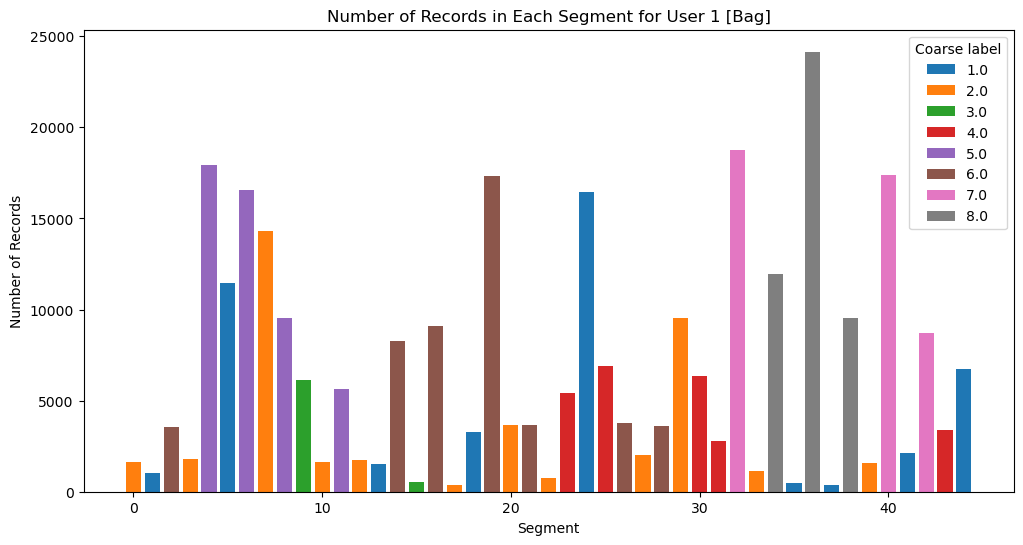

In [19]:
import matplotlib.pyplot as plt

# Plot the segment counts
plt.figure(figsize=(12, 6))

bag_data = segment_counts[segment_counts['Position'] == 'Bag'] # i just want one position
bag_data.reset_index(drop=True, inplace=True)
for coarse_label in set(bag_data.Coarse_label.unique()):
      plot_idx = bag_data[bag_data['Coarse_label'] == coarse_label].index
      plt.bar(bag_data.index[plot_idx], bag_data['Count'][plot_idx], label=coarse_label)
    

plt.xlabel('Segment')
plt.ylabel('Number of Records')
plt.title('Number of Records in Each Segment for User 1 [Bag]')
plt.legend(title='Coarse label')
plt.show()


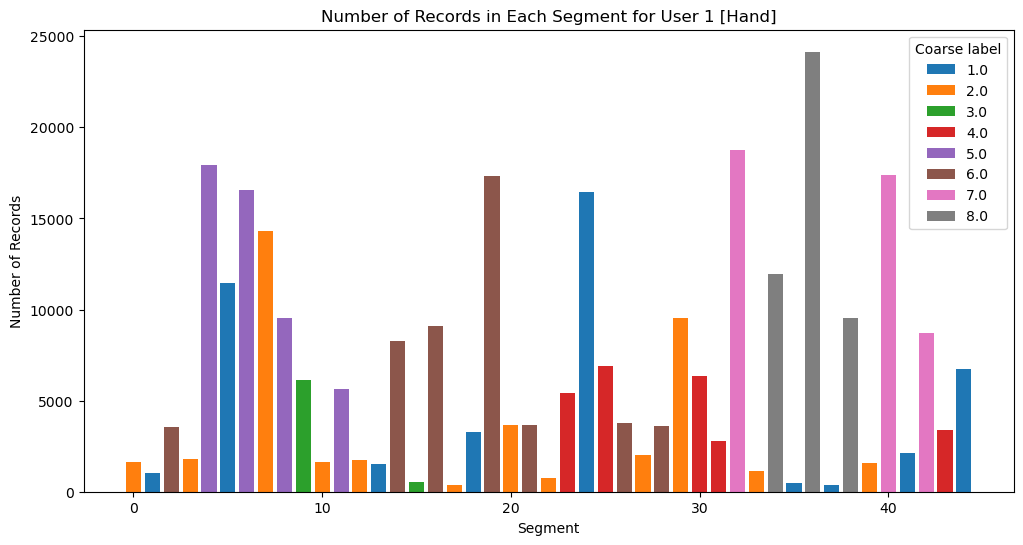

In [20]:
# Plot the segment counts
plt.figure(figsize=(12, 6))

hand_data = segment_counts[segment_counts['Position'] == 'Hand'] # i just want one position
hand_data.reset_index(drop=True, inplace=True)
for coarse_label in set(hand_data.Coarse_label.unique()):
      plot_idx = hand_data[hand_data['Coarse_label'] == coarse_label].index
      plt.bar(hand_data.index[plot_idx], hand_data['Count'][plot_idx], label=coarse_label)
    

plt.xlabel('Segment')
plt.ylabel('Number of Records')
plt.title('Number of Records in Each Segment for User 1 [Hand]')
plt.legend(title='Coarse label')
plt.show()


This is the number of records per label. This is just to remind you that `Counts` in `segment_counts` refers to the number of records per journey segment.

In [21]:
segment_counts.groupby(['Coarse_label'])[['Count']].sum()

,Count
Coarse_label,
1.0,173730
2.0,160813
3.0,26697
4.0,99328
5.0,198627
6.0,196731
7.0,179423
8.0,182387


In [22]:
segment_counts.groupby(['Coarse_label','Date'])[['Count']].sum()

Count
Coarse_label Date          
1.0          220617   50108
             260617   84905
             270617   38717
2.0          220617   77694
             260617   72331
             270617   10788
3.0          220617   24587
             260617    2110
4.0          260617   74722
             270617   24606
5.0          220617  198627
6.0          220617   14103
             260617  182628
7.0          270617  179423
8.0          270617  182387

Next let's look at the number of journey segments per coarse_label so that we can know how to split the data into training and test sets.

In [32]:
segment_counts.query('Position == "Bag"').groupby('Coarse_label')[['Segment']].count()#.sum()

,Segment
Coarse_label,
1.0,9
2.0,12
3.0,2
4.0,5
5.0,4
6.0,7
7.0,3
8.0,3


#### Splitting the dataset into training and test set (80:20)
Since each position has the same distribution it's best to determine segments based on just one position and apply it to the whole data.

In [34]:
segment_counts.query("Coarse_label == 5.0 & Position == 'Hand'").sort_values(by=['Date', 'Segment'])

,Position,Date,Segment,Coarse_label,Count
49,Hand,220617,5,5.0,17926
51,Hand,220617,7,5.0,16579
53,Hand,220617,9,5.0,9530
56,Hand,220617,12,5.0,5622


In [86]:
def determine_split_points(segment_counts, split_ratio):
      '''Determines which segments would be for training and which will be for test'''
      # this should contain the specific segments for training and test
      train_segments = []
      test_segments = []
      coarse_labels = np.sort(segment_counts.Coarse_label.unique())

      for coarse_label in coarse_labels:
            segments_subset = segment_counts[segment_counts['Coarse_label'] == coarse_label]
            segments_subset = segments_subset.sort_values(by=['Date', 'Segment'])
            n_segments = len(segments_subset)
            split_idx = int(n_segments * split_ratio)
            segments = segments_subset['Segment'].values
            #print(f'{coarse_label}: {segments}')

            train_segments.append(segments[:split_idx])
            test_segments.append(segments[split_idx:])
      
      return np.concatenate(train_segments), np.concatenate(test_segments), coarse_labels

Apply the split points to the main data

In [119]:
def split_main_data(data, segment_counts, split_ratio=0.8):
      '''Split data based on split ratio into training and test sets. Ensure segment_counts
      is based on 1 position.'''
      train_segments, test_segments, _ = determine_split_points(segment_counts, split_ratio)

      train_data = data[data['Segment'].isin(train_segments)].reset_index(drop=True)
      test_data = data[data['Segment'].isin(test_segments)].reset_index(drop=True)

      return train_data, test_data

Splitting the data

In [203]:
user1_file = './data/User_1_downsampled_dataset.csv'
user2_file = './data/User_2_downsampled_dataset.csv'
user3_file = './data/User_3_downsampled_dataset.csv'

users = ['User1', 'User2', 'User3']
columns = ['time_ms', 'acceleration_x', 'acceleration_y', 'acceleration_z',
           'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
           'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z',
           'Date', 'Position', 'Coarse_label', 'Fine_label',
           'Segment', 'User']

for i, user_file in enumerate([user1_file, user2_file, user3_file]):
      data = pd.read_csv(user_file)

      # removing NaN coarse_label
      keep_rows = data[data['Coarse_label'] != 0.0].index
      data = data.iloc[keep_rows, :]
      data = data.reset_index(drop=True)

      # add user to data
      data['User'] = users[i]

      # get segment_counts
      segment_counts = segment_data(data)
      
      # we just need one position for the split
      keep_rows = segment_counts[segment_counts['Position'] == 'Hand'].index
      segment_counts = segment_counts.iloc[keep_rows, :]
      segment_counts = segment_counts.reset_index(drop=True)

      # get train and test sets
      train_data, test_data = split_main_data(data, segment_counts, split_ratio=0.8)

      #save training data
      train_data[columns].to_csv(f'./data/train_data_User{i+1}.csv', index=False, header=True)
      test_data[columns].to_csv(f'./data/test_data_User{i+1}.csv', index=False, header=True)

      # clear from memory
      del data, segment_counts, train_data, test_data

      

### Checking the split

In [204]:
import pandas as pd

# Load the main dataset
user1_file = './data/User_1_downsampled_dataset.csv'
data = pd.read_csv(user1_file)

# Preprocess the main dataset
keep_rows = data[data['Coarse_label'] != 0.0].index
data = data.iloc[keep_rows, :]
data = data.reset_index(drop=True)

# get segment_counts
segment_counts = segment_data(data)

# Load the train and test data
train_data = pd.read_csv('./data/train_data_User1.csv')
test_data = pd.read_csv('./data/test_data_User1.csv')


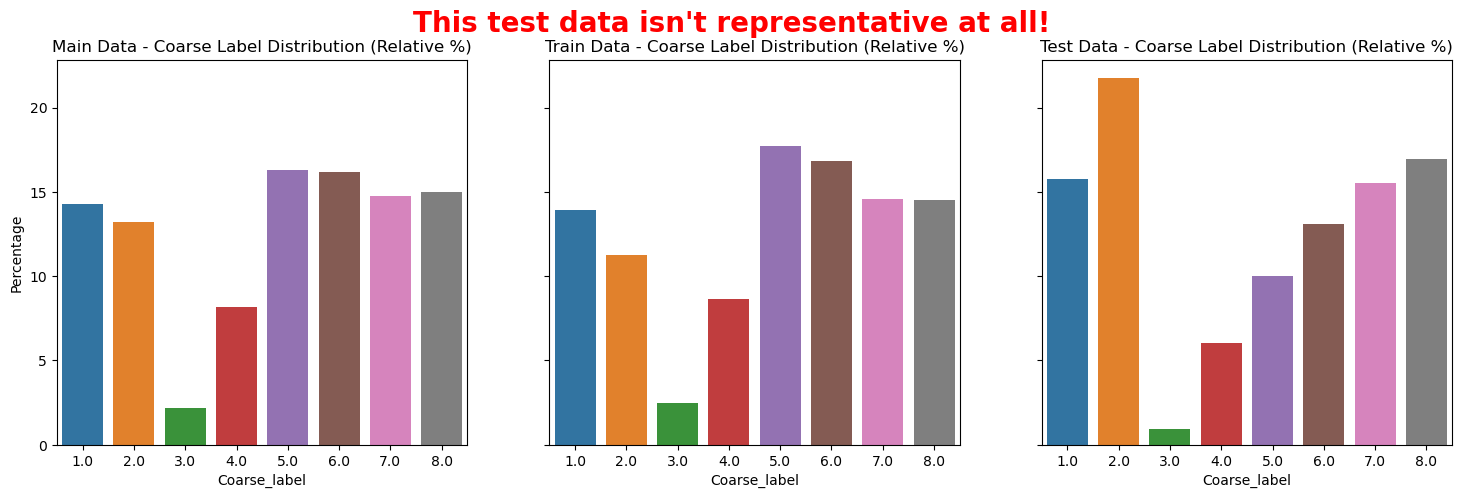

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions_relative(main_data, train_data, test_data, column, title):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Calculate relative percentages
    main_data_pct = main_data[column].value_counts(normalize=True) * 100
    train_data_pct = train_data[column].value_counts(normalize=True) * 100
    test_data_pct = test_data[column].value_counts(normalize=True) * 100

    sns.barplot(x=main_data_pct.index, y=main_data_pct.values, ax=ax[0])
    ax[0].set_title(f'Main Data - {title} (Relative %)')
    ax[0].set_ylabel('Percentage')
    ax[0].set_xlabel(column)

    sns.barplot(x=train_data_pct.index, y=train_data_pct.values, ax=ax[1])
    ax[1].set_title(f'Train Data - {title} (Relative %)')
    ax[1].set_xlabel(column)

    sns.barplot(x=test_data_pct.index, y=test_data_pct.values, ax=ax[2])
    ax[2].set_title(f'Test Data - {title} (Relative %)')
    ax[2].set_xlabel(column)

    # Set overall title with custom formatting
    fig.suptitle("This test data isn't representative at all!", fontsize=20, fontweight='bold', color='red')
    plt.show()

# Compare Coarse Label Distribution
compare_distributions_relative(data, train_data, test_data, 'Coarse_label', 'Coarse Label Distribution')


In [206]:
train_data

,time_ms,acceleration_x,acceleration_y,acceleration_z,gyroscope_x,gyroscope_y,gyroscope_z,orientation_w,orientation_x,orientation_y,orientation_z,Date,Position,Coarse_label,Fine_label,Segment,User
0,1.498121e+12,-8.226477,-2.719813,-6.876147,-0.717033,0.181210,-0.406699,0.180639,0.480659,0.811692,-0.278363,220617,Hand,2.0,5.0,1,User1
1,1.498121e+12,-11.382036,-4.711789,-10.275913,0.497543,-2.994469,-0.590985,0.327388,0.257041,0.829222,-0.372969,220617,Hand,2.0,5.0,1,User1
2,1.498121e+12,-4.563349,-3.035848,-9.734824,0.602772,0.302710,-2.142611,0.394898,0.151493,0.800387,-0.424760,220617,Hand,2.0,5.0,1,User1
3,1.498121e+12,-5.434838,1.312023,-18.655620,-3.608026,4.322921,3.969147,0.162248,0.327807,0.909369,-0.197693,220617,Hand,2.0,5.0,1,User1
4,1.498121e+12,-8.710106,-5.114015,-1.024718,-0.621243,-0.927884,-1.554389,0.152350,0.531489,0.827718,-0.095738,220617,Hand,2.0,5.0,1,User1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993040,1.498575e+12,5.592939,7.567559,2.465087,0.029185,0.112536,0.118371,0.783784,0.449304,-0.422381,-0.073452,270617,Torso,7.0,16.0,41,User1
993041,1.498575e+12,5.650316,7.546524,2.495780,0.083902,0.136436,0.058776,0.781103,0.433410,-0.440343,-0.090164,270617,Torso,7.0,16.0,41,User1
993042,1.498575e+12,5.763186,7.228665,2.702484,0.172004,-0.022953,-0.024435,0.783833,0.438785,-0.431300,-0.083980,270617,Torso,7.0,16.0,41,User1
993043,1.498575e+12,5.717354,7.282210,2.627882,0.212161,-0.024014,-0.098820,0.778037,0.455886,-0.424573,-0.080985,270617,Torso,7.0,16.0,41,User1


In [207]:
train_data.columns

Index(['time_ms', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'orientation_w',
       'orientation_x', 'orientation_y', 'orientation_z', 'Date', 'Position',
       'Coarse_label', 'Fine_label', 'Segment', 'User'],
      dtype='object')

### Time to get the small sample that I'll be working with for now

In [212]:
import pandas as pd

train_files = [
    './data/train_data_User1.csv',
    './data/train_data_User2.csv',
    './data/train_data_User3.csv'
]

columns = ['time_ms', 'acceleration_x', 'acceleration_y', 'acceleration_z',
           'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
           'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z',
           'Date', 'Position', 'Coarse_label', 'Fine_label',
           'Segment', 'User']

In [213]:
# train_data.query('Position == "Bag"').groupby(['Segment'])[['Coarse_label']].count()

In [214]:
# Initialize an empty DataFrame for the tiny sample dataset
tiny_sample_data = pd.DataFrame(columns=columns)

# Function to select a contiguous slice of data from each segment
def sample_contiguous_slice(data, slice_ratio=0.025):
      sampled_data = pd.DataFrame(columns=data.columns)
      segments = data['Segment'].unique()
      positions = data['Position'].unique()

      for position in positions:
            for segment in segments:
                  segment_data = data[(data['Segment']==segment) & (data['Position']==position)].reset_index(drop=True)
                  slice_size = int(slice_ratio * len(segment_data))

                  # ensure you choose a random slice where the endpoints exist
                  err = True
                  while err:
                        start_idx = np.random.randint(0, slice_size//2) # let the start idx be anywhere from 0 to the middle of the segment
                        end_idx = start_idx + slice_size
                        
                        if end_idx > len(segment_data):
                              err = True
                        else:
                              err = False
                  
                  sampled_segment_data = segment_data.iloc[start_idx:end_idx]
                  sampled_data = pd.concat([sampled_data, sampled_segment_data])
      return sampled_data

for i, train_file in enumerate(train_files):
      train_data = pd.read_csv(train_file)
      
      # Sample data from each segment
      sampled_data = sample_contiguous_slice(train_data, 0.025)
      
      # Append the sampled data to the tiny_sample_data DataFrame
      tiny_sample_data = pd.concat([tiny_sample_data, sampled_data])

      # Clear from memory
      del train_data, sampled_data

# Save the combined tiny sample dataset
tiny_sample_data.to_csv('./data/tiny_sample_data.csv', index=False, header=True)

print("Tiny sample data has been saved to './data/tiny_sample_data.csv'")


Tiny sample data has been saved to './data/tiny_sample_data.csv'
